In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("COVID-19 India Statewise Vaccine Data.csv")

In [ ]:
df.head()

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Precaution,Population
0,Andaman And Nicobar,991264,313284,320383,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,81191,1711947
3,Assam,50335778,22550941,20575569,2108179,35998752
4,Bihar,157293015,62956601,59160917,12022637,128500364


In [ ]:
df.shape

(36, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose1                    36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Precaution               36 non-null     int64 
 5   Population               36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [ ]:
df.describe()

,Total Vaccination Doses,Dose1,Dose 2,Precaution,Population
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,6.115204e+07,2.555900e+07,2.400569e+07,4.404951e+06,3.971861e+07
std,7.945565e+07,3.235136e+07,3.065844e+07,7.040571e+06,5.050913e+07
min,1.453130e+05,5.691400e+04,5.601900e+04,1.599000e+04,6.600100e+04
25%,2.287468e+06,1.045788e+06,8.914968e+05,1.323675e+05,1.695473e+06
50%,4.064265e+07,1.778092e+07,1.523439e+07,1.339208e+06,2.410088e+07
75%,1.121485e+08,4.281551e+07,4.431351e+07,6.229141e+06,6.979986e+07
max,3.920112e+08,1.540970e+08,1.478667e+08,3.664327e+07,2.315026e+08


In [ ]:
df.isnull().sum()

,0
State/UTs,0
Total Vaccination Doses,0
Dose1,0
Dose 2,0
Precaution,0
Population,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Top and Bottom 5 states by Dose1 and Dose2 percentages

In [ ]:
df['Dose1_%'] = (df['Dose1'] / df['Population']) * 100
df['Dose2_%'] = (df['Dose 2'] / df['Population']) * 100
df['Dose1_to_Dose2_Dropoff_%'] = ((df['Dose1'] - df['Dose 2']) / df['Dose1']) * 100


print("\nTop 5 States by Dose1%:")
print(df.sort_values(by='Dose1_%', ascending=False)[['State/UTs', 'Dose1_%']].head())


Top 5 States by Dose1%:
                                   State/UTs    Dose1_%
7   Dadra And Nagar Haveli And Daman And Diu  94.426077
5                                 Chandigarh  94.127578
9                                        Goa  89.031086
18                               Lakshadweep  86.232027
8                                      Delhi  86.031897


In [ ]:
print("\nBottom 5 States by Dose1%:")
print(df.sort_values(by='Dose1_%')[['State/UTs', 'Dose1_%']].head())

print("\nTop 5 States by Dose2%:")
print(df.sort_values(by='Dose2_%', ascending=False)[['State/UTs', 'Dose2_%']].head())

print("\nBottom 5 States by Dose2%:")
print(df.sort_values(by='Dose2_%')[['State/UTs', 'Dose2_%']].head())


Bottom 5 States by Dose1%:
         State/UTs    Dose1_%
22       Meghalaya  35.324221
24        Nagaland  40.421567
21         Manipur  42.607540
1   Andhra Pradesh  44.323442
4            Bihar  48.993325

Top 5 States by Dose2%:
              State/UTs    Dose2_%
18          Lakshadweep  84.875987
9                   Goa  80.456665
0   Andaman And Nicobar  80.296290
5            Chandigarh  79.552606
29               Sikkim  77.373754

Bottom 5 States by Dose2%:
            State/UTs    Dose2_%
22          Meghalaya  27.185445
24           Nagaland  33.030514
21            Manipur  35.680959
14          Jharkhand  40.180930
2   Arunachal Pradesh  43.722440


Dose 1 % by State

<ipython-input-20-d4989ec53992>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='State/UTs', x='Dose1_%', data=df.sort_values('Dose1_%', ascending=False), palette='viridis')


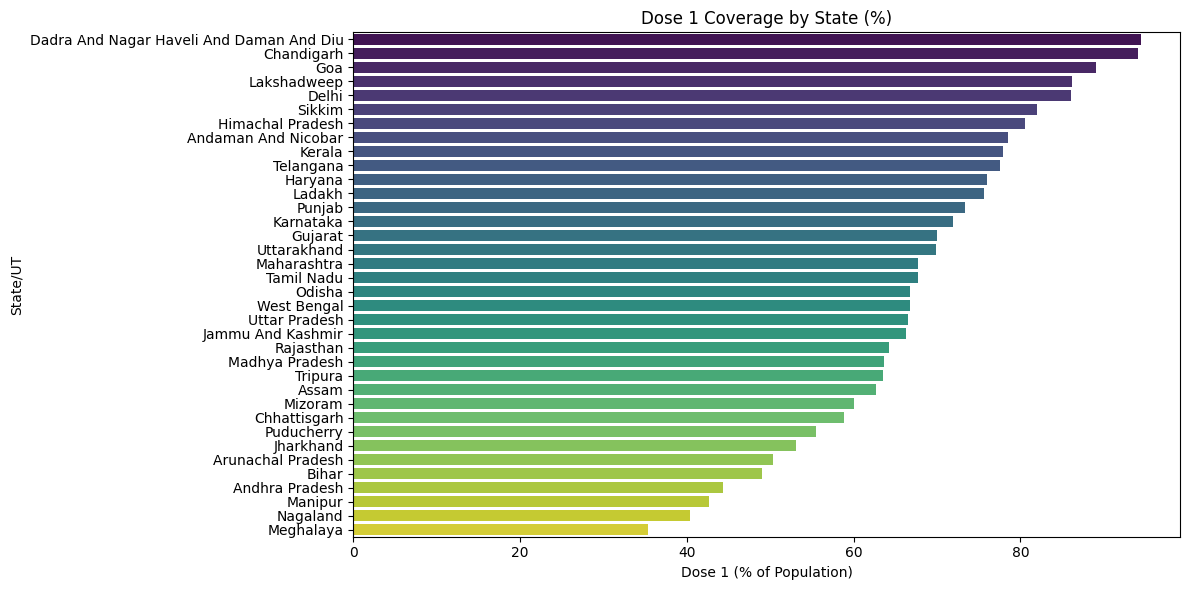

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='State/UTs', x='Dose1_%', data=df.sort_values('Dose1_%', ascending=False), palette='viridis')
plt.title("Dose 1 Coverage by State (%)")
plt.xlabel("Dose 1 (% of Population)")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


Dose 2 % by State

<ipython-input-21-cb30d28301c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='State/UTs', x='Dose2_%', data=df.sort_values('Dose2_%', ascending=False), palette='magma')


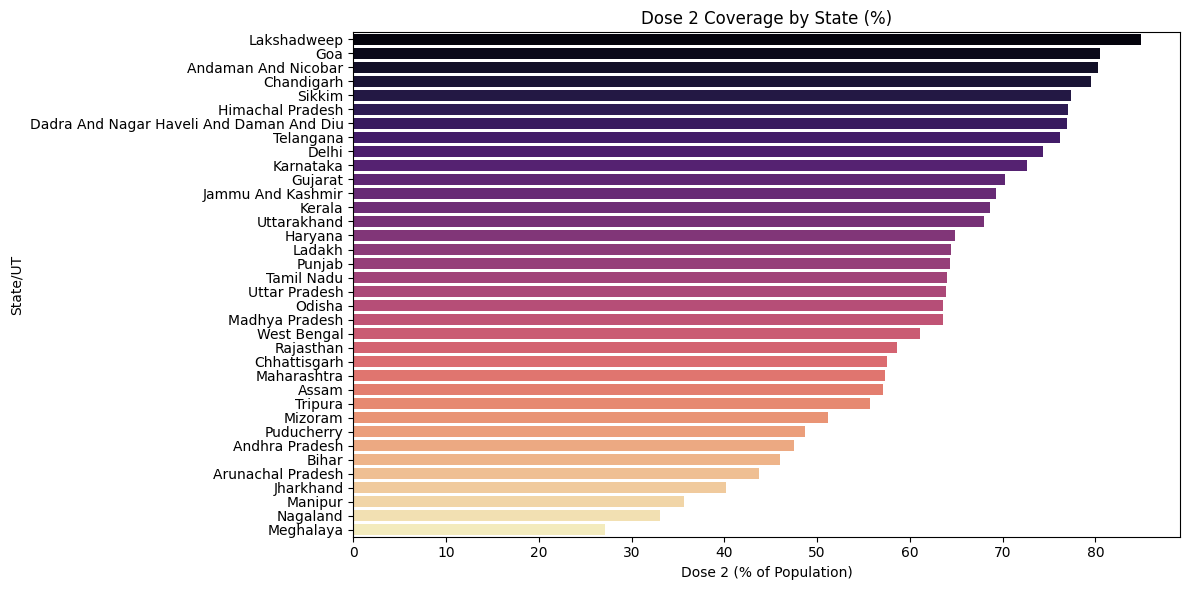

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(y='State/UTs', x='Dose2_%', data=df.sort_values('Dose2_%', ascending=False), palette='magma')
plt.title("Dose 2 Coverage by State (%)")
plt.xlabel("Dose 2 (% of Population)")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


Population vs Vaccination

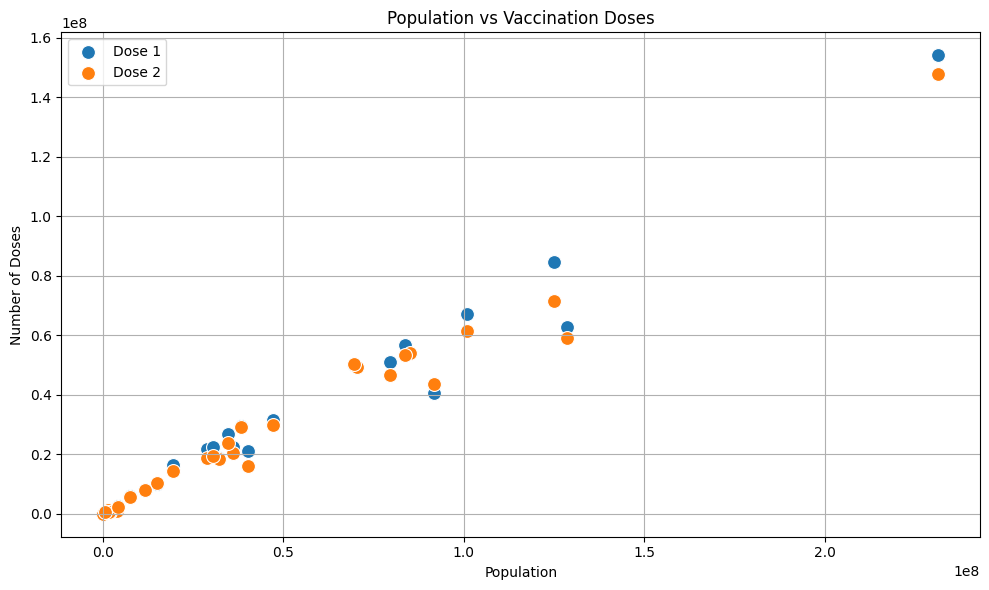

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Dose1', data=df, label='Dose 1', s=100)
sns.scatterplot(x='Population', y='Dose 2', data=df, label='Dose 2', s=100)
plt.title("Population vs Vaccination Doses")
plt.xlabel("Population")
plt.ylabel("Number of Doses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Total Dose 1 and Dose 2 coverage

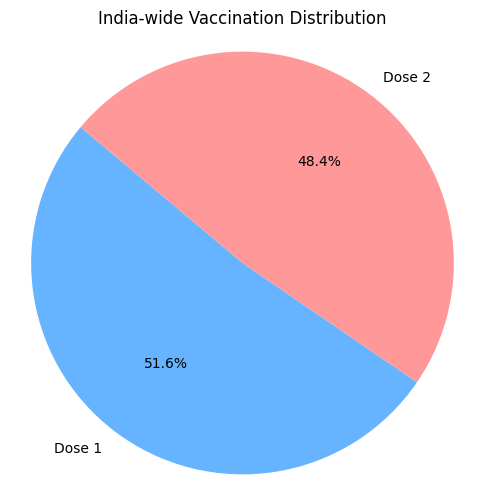

In [ ]:

total_dose1 = df['Dose1'].sum()
total_dose2 = df['Dose 2'].sum()
labels = ['Dose 1', 'Dose 2']
sizes = [total_dose1, total_dose2]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("India-wide Vaccination Distribution")
plt.axis('equal')
plt.show()